<a href="https://colab.research.google.com/github/Rigved19/NLP-Language-Translation/blob/main/ML%20Clustering%20Algorithms/Unsuccessful_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans , MeanShift
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [2]:
data = pd.read_csv ("/content/unlabelled_data.csv")

In [3]:
data.head()

,Id,Speed,RPM,Engine Load
0,131505,7,898,44
1,133384,7,898,44
2,131504,1,917,32
3,133424,1,917,32
4,131503,0,774,38


In [4]:
## Data Cleaning
df = data[data["Speed"] != 0]   #Deleting Rows with Speed Value as 0

In [5]:
for x in range(df.shape[0]):     #Frontfilling RPM = 0 values
  if df.iloc[x]["RPM"] == 0:
    df.iloc[x]["RPM"] = df.iloc[x-1]["RPM"]  

a = df[df["Engine Load"] == 0 ].index
df.drop(a , axis = 0 , inplace = True)     

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
##Deleting Rows having RPM Values lower than 1000
idx = df[df["RPM"] < 1000].index
df1 = df.drop( idx, axis = 0)

idx =  df1[df1["RPM"] > 2500].index
df1 = df1.drop (idx , axis = 0)

idx = df1[df1["Speed"] > 90].index
df1 = df1.drop (idx , axis = 0)

In [7]:
count  = df1[df1["RPM"] < 1000]
print(count)

Empty DataFrame
Columns: [Id, Speed, RPM, Engine Load]
Index: []


In [8]:
train = df1.copy()
x = train["Speed"].to_numpy()
y = train["RPM"].to_numpy()
X = train.iloc[:,[1,2]].values

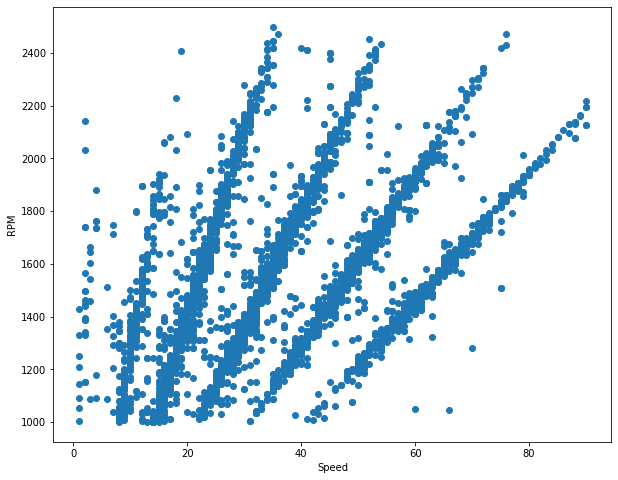

In [9]:
plt.figure( figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x , y)
plt.show()

In [10]:
## Scaling the Data
y_reshaped = y.reshape(-1,1)
x_reshaped = x.reshape(-1,1)
Standard = StandardScaler()
MinMax1 = MinMaxScaler(feature_range = (0.001,1))
y_scaled = MinMax1.fit_transform(y_reshaped)
MinMax2 = MinMaxScaler(feature_range = (0.001,1))
x_scaled = MinMax2.fit_transform(x_reshaped)
X_scaled = np.concatenate( (x_scaled , y_scaled) , axis = 1)  
#y_scaled= Standard.fit_transform(y_reshaped)
#x_scaled= Standard.fit_transform(x_reshaped)

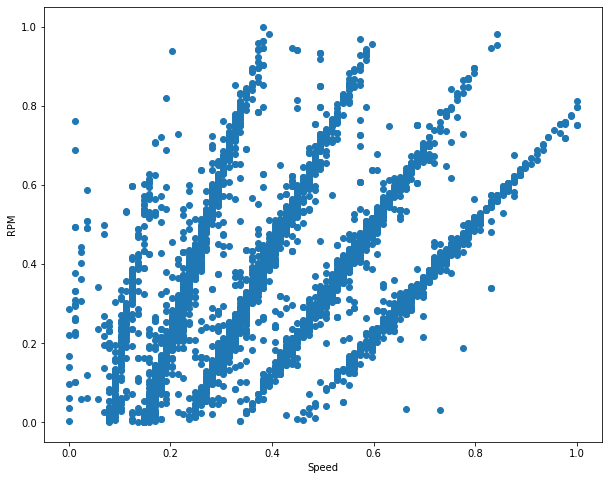

In [11]:
plt.figure(figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled)
plt.show()

In [12]:
## Using Kmeans
kmeans = KMeans(n_clusters=6 , random_state = 0)
y_kmeans1 = kmeans.fit_predict(X_scaled)
print (y_kmeans1)

[3 3 1 ... 3 3 3]


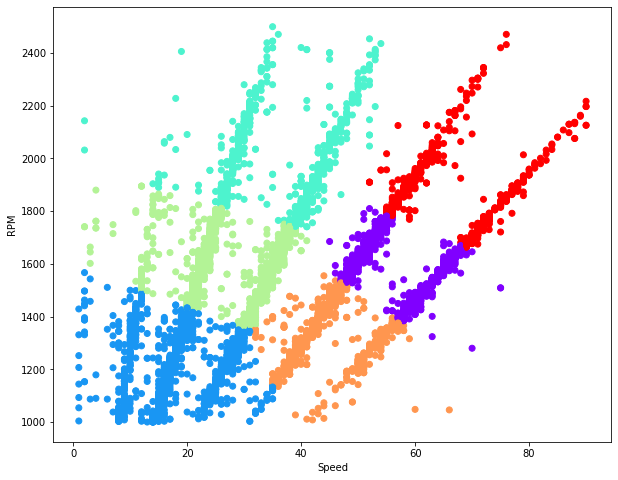

In [13]:
plt.figure( figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x , y , c = y_kmeans1, cmap="rainbow")

In [14]:
##Using MeanShift
ms = MeanShift(bandwidth = 0.1 , max_iter =300 , cluster_all = True)
y_mean = ms.fit_predict(X_scaled)
print (y_mean)
cluster_centers = ms.cluster_centers_
labels = ms.labels_
n_cluster = len(np.unique(labels)) 
print("No. of clusters", n_cluster)
print("Cluster Centres", cluster_centers )


[3 3 0 ... 3 3 3]
No. of clusters 8
Cluster Centres [[0.25582015 0.22554886]
 [0.52449746 0.35686247]
 [0.68175871 0.33430732]
 [0.37745717 0.37913627]
 [0.0312204  0.46018138]
 [0.69693258 0.032302  ]
 [0.01222472 0.725275  ]
 [0.20304494 0.937396  ]]


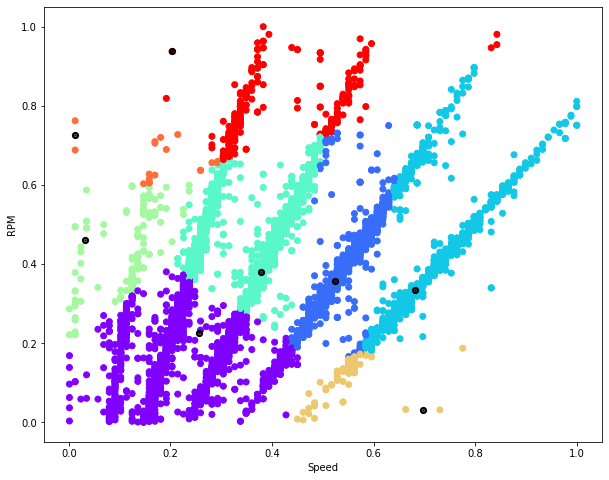

In [15]:
plt.figure( figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = y_mean, cmap="rainbow")
plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker = ".", color = 'k', s = 20, linewidths = 5, zorder = 10)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklea

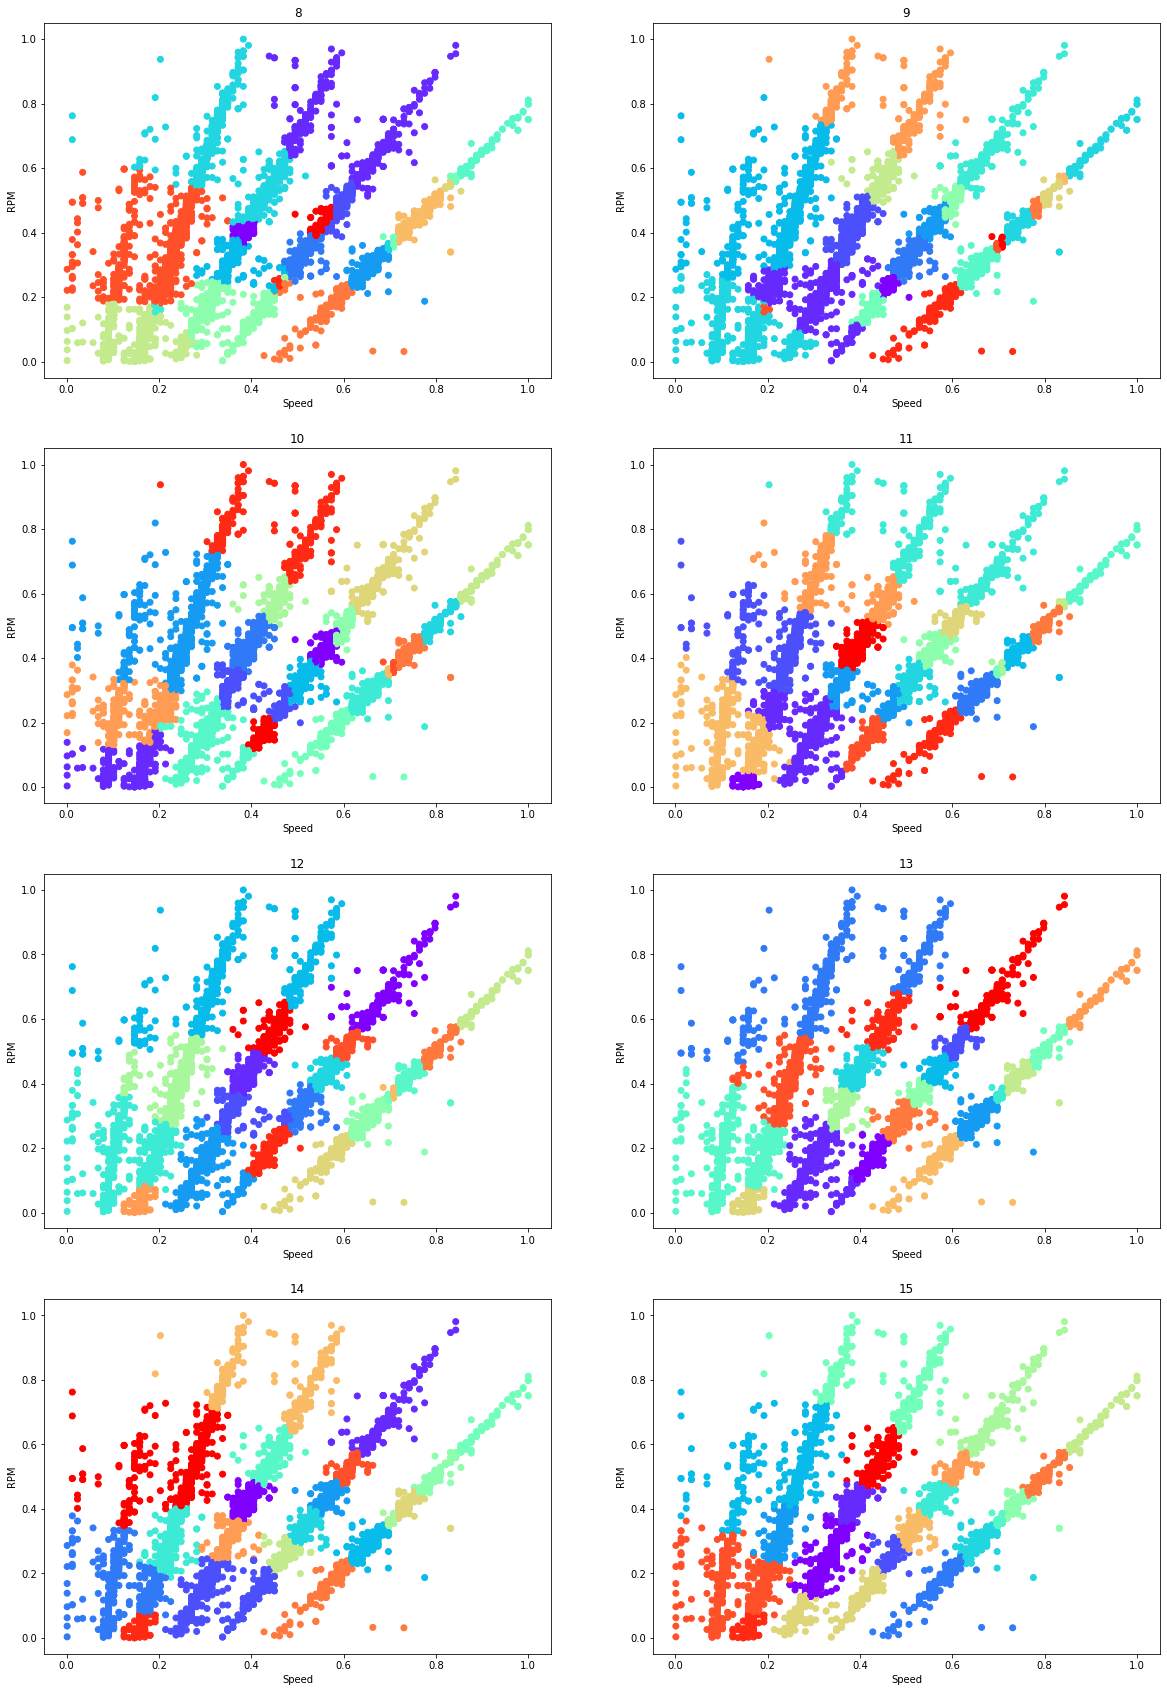

In [16]:
##Using Spectral Custering 
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize

# Scaling the Data
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X_scaled)
  
# Normalizing the Data
X_normalized = normalize(X_scaled1)

plt.figure(figsize=(20,30))
for i in range (8,16) :
  sp_cl = SpectralClustering(n_clusters = 20 , affinity ='nearest_neighbors' , n_neighbors = i)
  labels = sp_cl.fit_predict(X_scaled)
  plt.subplot (4,2,i-7)
  plt.title(str(i))
  plt.xlabel("Speed")
  plt.ylabel("RPM") 
  plt.scatter(x_scaled , y_scaled , c = labels , cmap="rainbow")



In [17]:
## OPTICS Algortithm
from sklearn.cluster import OPTICS, cluster_optics_dbscan

# Building the OPTICS Clustering model
optics_model = OPTICS(min_samples = 10, xi = 0.05, max_eps=1, min_cluster_size = None)
  
# Training the model
optics_model.fit(X_normalized)

labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 0.005)
  
labels = optics_model.labels_[optics_model.ordering_]  
print(labels)
print(len(set(labels)))

[ 0  0  0 ... -1 -1 -1]
302


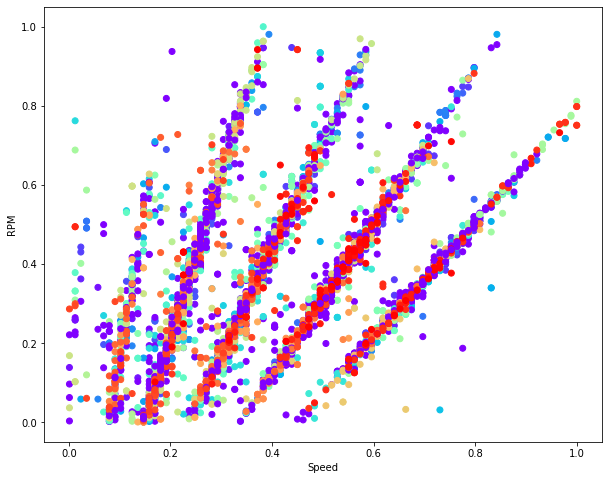

In [18]:
plt.figure(figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = labels , cmap="rainbow")

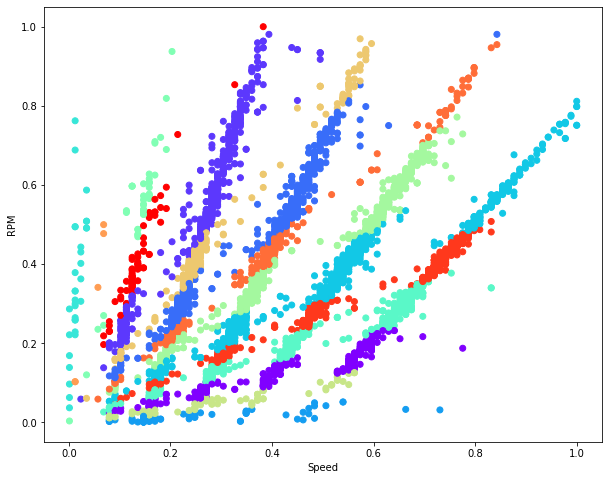

In [19]:
## Using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=15, affinity='cosine', linkage='average')
model.fit(X_scaled)
labels3 = model.labels_
plt.figure(figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = labels3 , cmap="rainbow")